In [1]:
import pandas as pd

import sys
sys.path.append('..')
from lib import *
plt.style.use('../custom.mplstyle')

In [2]:
# overview of numbers
for cohort in [1, 2]:
    meta = load_metadata_emerson(cohort=cohort, filtered=False)
    meta_f = load_metadata_emerson(cohort=cohort, filtered=True)
    noage = np.sum(meta['Age'].isna())
    print(cohort, meta.shape[0], 'filtered', meta_f.shape[0], 'noage', noage, 'format difference', meta.shape[0]-meta_f.shape[0]-noage)
meta = load_metadata_lindau()
print('lindau', meta.shape[0])
meta = load_metadata_adaptive_all(filtered=True)
print('all', meta.shape[0],
      'Age: %g-%g'%(round(meta['Age'].min()), meta['Age'].max()))
meta = load_metadata_britanova()
mask = meta['age']>0
print('britanova', 'adult', meta[mask].shape[0], 'cordblood', meta.shape[0]-meta[mask].shape[0],
      'Age: %g-%g'%(meta[mask]['age'].min(), meta['age'].max()))

1 666 filtered 493 noage 111 format difference 62
2 120 filtered 120 noage 0 format difference 0
lindau 8
all 621 Age: 1-74
britanova adult 71 cordblood 8 Age: 6-103


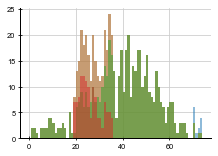

In [3]:
for cohort in ['all', 'both', 1, 2]:
    if cohort == 'all':
        meta = load_metadata_adaptive_all(filtered=True)
    else:
        meta = load_metadata_emerson(cohort=cohort)
    meta['Age'].hist(bins=np.arange(0, 75, 1), histtype='stepfilled', alpha=.5)

In [4]:
meta = load_metadata_emerson(cohort='both')
meta['CMVpos'].value_counts()

False    326
True     286
Name: CMVpos, dtype: int64

In [5]:
meta = load_metadata_emerson(cohort='both')
metaunfiltered = load_metadata_emerson(cohort='both', filtered=False)
meta_lindau = load_metadata_lindau()
metaall = pd.concat([meta, meta_lindau])

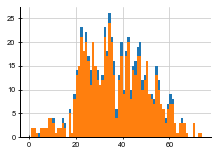

In [6]:
metaunfiltered['Age'].hist(bins=np.arange(0, 75, 1), histtype='stepfilled', alpha=1)
meta['Age'].hist(bins=np.arange(0, 75, 1), histtype='stepfilled', alpha=1)

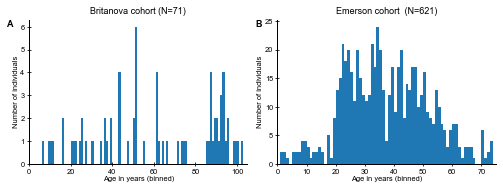

In [7]:
fig, axes = plt.subplots(figsize=(7, 2.7), ncols=2)

meta = load_metadata_britanova()
mask = meta['age']>0
meta[mask]['age'].hist(bins=np.arange(0, 104, 1), histtype='stepfilled', ax=axes[0])
axes[0].set_xlim(0, 105)
axes[0].set_title('Britanova cohort (N=%g)'%len(meta[mask]))

metaall['Age'].hist(bins=np.arange(0, 75, 1), histtype='stepfilled', ax=axes[1])
axes[1].set_xlim(0, 75)
axes[1].set_title('Emerson cohort  (N=%g)'%len(metaall))


for ax in axes:
    ax.set_xlabel('Age in years (binned)')
    ax.set_ylabel('Number of individuals')
    ax.grid()
label_axes(axes)
fig.tight_layout()
fig.savefig(figure_directory+'cohortages.svg')